# Probability and Statistics Module - Test 

## Due at Noon on January 8th, 2018


You may use all Notes & Exercises (with answers) from class and the entirety of the internet to help you complete this assignment, but there is **ABSOLUTELY NO COLLABORATION PERMITTED**.
 
   
## Answering Instructions

- Some of the questions below require you to write some code; you will be principally graded on whether the results the code produces (plots, computations, etc.) are correct. But if the results are incorrect, and **if** you wrote clean intelligible code, you may salvage some points if the code is partially correct. (This won't work if your code is hard to follow - comments will help here!)


 
## Submission Instructions
- Failure to follow submission instructions **EXACTLY** may result in a grade of **0**

- **No Late Submissions** without a Dean's Excuse, an assignment submitted after the due date may result in a grade of **0**

- Please send an email to the TA grader for this module, Mike Morais, at `mjmorais@princeton.edu` with the subject line:

> `[NEU_314_2017] FirstName LastName Assignment 4`

> For example, "[NEU_314_2017] Jane Smith Assignment 4"

- In the email, please attach **only** your completed notebook file **and** any image files you've added. Make sure you don't forget to include any image files that you've used! Files forgotten will count as files not made. The notebook should be renamed to have the filename:

> `FirstName_LastName_Assignment4.ipynb`

> For example, "Jane_Smith_Assignment4.ipynb"



- Please run the `Restart & Clear Output` option on your notebook before saving and sending your notebook (the grader will do this anyway if you don't)
 
 
### Maximum score is 50 points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.75)
%matplotlib inline

# Problem 1 | Expected Value (6 pts)

### 1a) Discrete distributions (3 pts)
Consider a random variable, $X$, that can take the values, $[0, 1, 2, 3, 4, 5]$ with corresponding probabilities $[.1, .1, .2, .3, .2,.1]$.  Calculate the expected value of $X$. Calculate the expected value of $X^2$

In [2]:
x = np.arange(6)
x2 = np.power(x, 2)
p = np.array([0.1,0.1,0.2,0.3,0.2,0.1])

print('E(X) = %0.2f' %(x.dot(p)))
print('E(X^2) = %0.2f' %(x2.dot(p)))

E(X) = 2.70
E(X^2) = 9.30


### 1b)  Continuous distributions (3 pts)
Consider a random variable, $X$, that is drawn from a Gaussian distribution with mean of 3 and a variance of 5, i.e. $X \sim \mathcal{N}(3,5)$. Show, numerically, that the expected value of this distribution is equal to 3 (the distribution's mean).  You will need the pdf of a Gaussian (for which you can either code the formula yourself or use an appropriate function from the `scipy.stats` package imported above). However, instead of solving the expected value integral directly, compute the expected value as you would for a discrete distribution — use a large range of values of $X$ (try -500 to 500) and a small step size (try $dx = .01$).

In [3]:
from scipy.stats import norm

x = np.linspace(-500,500,1001)
pdf = norm(3,5).pdf(x)

print('E(N(3,5)) = %0.2f' %(x.dot(pdf)))

E(N(3,5)) = 3.00


# Problem 2 | Joint, Marginal, & Conditional Distributions (12 pts)

The following code (from the solutions of the most recent exercises) calculates the probability of a point $x$ being sampled from a multivariate Gaussian distribution with parameters, $\mu$ and $C$ (mean and covariance) supplied by the user in addition to $x$:

In [4]:
def mvnDensity(x,mu,C): # mvn = multivariate normal
    mu1 = mu - x
    invC = np.linalg.inv(C)
    quadtrm = mu1 @ invC @ mu1.T
    exptrm = np.exp(-0.5 * quadtrm)
    dettrm = np.linalg.det(2 * np.pi * C)
    px = exptrm / np.sqrt(dettrm)
    return px

### 2a) Conditional Distributions of Gaussians (7 pts)
Consider two different 2D Gaussian distributions, call them Distribution 1 and Distribution 2. Both are functions of two varaiables, $\begin{bmatrix} x\\ y \end{bmatrix}$. They both have $\mu = \begin{bmatrix} 0\\ 0 \end{bmatrix}$, but Distribution 1 has covariance $C_1 = \begin{bmatrix} 15 & 0\\ 0 & 4 \end{bmatrix}$ and Distribution 2 has $C_2 =\begin{bmatrix} 15 & 5\\ 5 & 8 \end{bmatrix}$. 

Generate two figures, one for Distribution 1 and a second for Distribution 2. On each figure, plot lines for two conditional distributions, $p(y\;|\;x = 2.5)$ and $p(y\;|\;x = -3.5)$ (try a range of $y=-15$ to $+15$, by steps of 0.5). 

What is different about your two distributions? Where can you see this difference in the math defining each distribution?

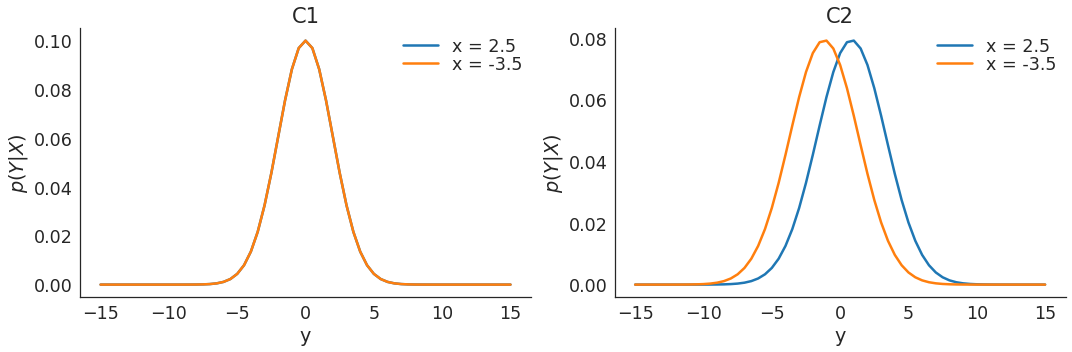

In [5]:
## Define distribution parameters.
mu = np.array([0,0])
c1 = np.array([[15, 0],
               [ 0, 4]])
c2 = np.array([[15, 5],
               [ 5, 8]])

## Initialize grid.
X = Y = np.arange(-15,15.1,0.5)
grid = np.array(np.meshgrid(Y,X)).T

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(15,5))

## Main loop.
prob_dist = []
for ax, cov, title in zip(axes, [c1,c2], ['C1','C2']):
    
    ## Compute joint density.
    joint_density = np.apply_along_axis(mvnDensity, -1, grid, mu, cov)
    
    ## Compute marginal probability over x.
    marginal_prob_x = joint_density.sum(axis=1)
    
    ## Iterate over x-values.
    for x in [2.5,-3.5]:        
        
        ## Compute conditional probability.
        cond_prob = joint_density[X==x].squeeze() / marginal_prob_x[X==x]
        prob_dist.append(cond_prob)
        
        ## Plot.
        ax.plot(Y, cond_prob, lw=2.5, label='x = %s' %x)
        
    ## Add info.
    ax.set(xlabel='y', ylabel=r'$p( Y | X)$', title=title)
    ax.legend(loc=1, borderpad=0, labelspacing=0)

## Save list of PDFs for next part.
prob_dist = np.array(prob_dist).reshape(2,2,Y.size)

sns.despine()
plt.tight_layout()

The most obvious difference between the two distributions is the presence of covariance between the X and Y variables in the second distribution. In other words, X and Y are positively correlated in the second distribution such that more positive values of X predict more positive values of Y. In contrast, the first plot shows overlap because without covariance, the Y values are independent of X. The covariance is specified in the off-diagonal elements of the covariance matrices.

Less noticeable but still present is an increase in the variance of Y in the second distribution. In other words, more diffuse values of Y (farther from zero) are more likely in the second distribution than the first as indicated by the diffuse concentration of likelihood in the second plot. This is specified in the diagonal elements of the covariance matrices.

### 2b) Marginal Distribution of a Gaussian (5 pts)
Using the same `mvnDensity()` function, calculate the marginal distribution over $y$ for Distribution 2. Plot this along with the conditionals calculated above for Distribution 2, being sure to clearly label the 3 lines.

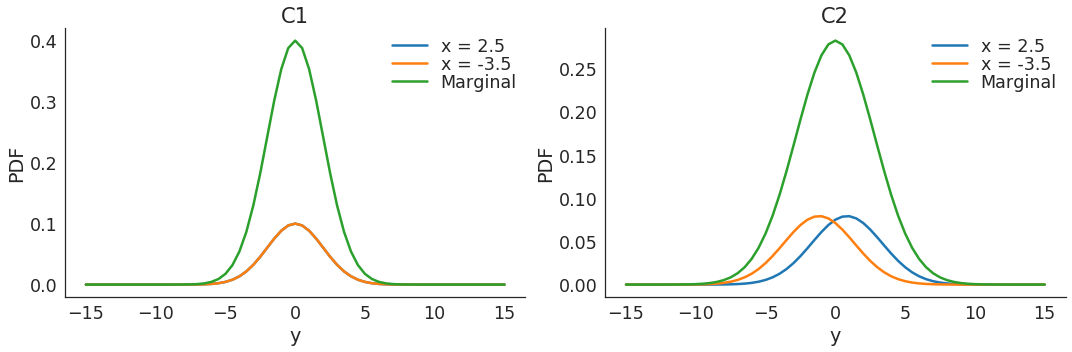

In [6]:
## Initialize grid.
x = y = np.arange(-15,15.1,0.5)
grid = np.array(np.meshgrid(y,x)).T

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(15,5))

## Main loop.
for ax, arr, cov, title in zip(axes, prob_dist, [c1,c2], ['C1','C2']):
    
    ## Compute joint density.
    joint_density = np.apply_along_axis(mvnDensity, -1, grid, mu, cov)
    
    ## Compute marginal probability over y.
    marginal_prob_y = joint_density.sum(axis=0)
    
    ## Plot.
    ax.plot(Y, arr[0], lw=2.5, label='x = 2.5')
    ax.plot(Y, arr[1], lw=2.5, label='x = -3.5')
    ax.plot(Y, marginal_prob_y, lw=2.5, label='Marginal')
    
    ## Add info.
    ax.set(xlabel='y', ylabel='PDF', title=title)
    ax.legend(loc=1, borderpad=0, labelspacing=0)
    
sns.despine()
plt.tight_layout()

---
# Problem 3 | Deriving the MLE (15 pts)
The final question of your final exercise set (`Exercises_Day22.ipynb`, **Q6**) asked you to derive the Maximum Likelihood Estimate for the exponential distribution:
> Suppose we have a neuron that responds linearly to a stimulus $x$ with a slope parameter $\theta$ (just like before), but now the noise is controlled by an exponential distribution:

> $$P(y\mid x) = (\theta x)e^{−(\theta x)y}$$

>Derive the maximum likelihood estimator for $\theta$ based on a set of $x_i$ and $y_i$ data points (just like before). You should be able to find a closed form expression.

If you completed the problem, you should have found that $\theta_\text{MLE} = \frac{N}{\sum_i^N x_i y_i}$. If you did not arrive at this solution, the answer key has the full derivation, posted again below:
> $$\prod_i^N (\theta x_i) e^{-(\theta x_i)y_i}$$
> $$\sum_i^N \log(\theta x_i) -\theta x_i y_i$$
> $$\sum_i^N \frac{x_i}{\theta x_i} - x_i y_i = 0$$
> $$\frac{N}{\theta} = \sum_i^N x_i y_i$$
> $$\theta_{MLE} = \frac{N}{\sum_i^N x_i y_i}$$

Look, we did all the hard math already! All **you** have to do is explain, for each step of the proof, **how** we got to that step and **why** we took that step in the first place. In **English** (within the Markdown cells provided below). Note that Markdown cells do allow you to type $\mathcal{FANCY\;\,MATH}$, but it is 100% unnecessary here — every explanation and justification can be done in words (though if you _really_ want to use LaTeX, feel free). 

In order to save poor Mike from tearing out his hair while grading these, we're going to prevent the classic "I have no idea what I'm talking about, so I'll write a small novel and hope no one notices" technique and **limit each response to 100 words max**. Be _precise_ and _concise_!

---

### 3a) Explain the first line (3 pts)
What is that funny $\Pi$ symbol, what is it doing, and why is it doing it?
$$\prod_i^N (\theta x_i) e^{-(\theta x_i)y_i}$$

The Greek uppercase letter pi, $\Pi$, denotes the product operator. The product operator implies the multiplication of the series of likelihood values, $p( \theta \ | \ x_i, y_i )$, for all $N$ values. The total product of the series of likelihood values provides an estimate of the model likelihood, or its goodness of fit.

### 3b) What happened from the first line to the second? (3 pts)
What happened to our funny $\Pi$ symbol? Why did we get rid of it?
$$\sum_i^N \log(\theta x_i) -\theta x_i y_i$$

The $\Pi$ symbol is replaced by the Greek uppercase letter sigma, $\Sigma$, which denotes the summation operator. Here, the summation operator implies of the addition of all log-likelihood values in the series. We can substitute $\Sigma$ for $\Pi$ when we take the log of the series because, for any two real numbers $C_1$ and $C_2$, $\text{log}(C_1 \cdot C_2) = \text{log}(C_1) + \text{log}(C_2)$. We take the log of the likelihood values and perform this substitution because likelihood values are frequently very small numbers and thus their logs are more numerically stable.  

### 3c) What happened from the second line to the third? (3 pts)
Why did we do this?
$$\sum_i^N \frac{x_i}{\theta x_i} - x_i y_i = 0$$

We take the derivative with respect to theta, $\theta$, to solve for the minimum of the likelihood function.  

### 3d) What happened from the third line to the fourth? (3 pts)
Why is there no $\Sigma$ on the left now? Where did that $N$ come from?
$$\frac{N}{\theta} = \sum_i^N x_i y_i$$

Beginning with (3c), we first move the right-half of the left-hand expression to the right side:

> $\sum_i^N \frac{x_i}{\theta x_i} = \sum_i^N x_i y_i $

Next we note that $x_i$ in the numerator and denominator cancels itself out:

> $\sum_i^N \frac{1}{\theta } = \sum_i^N x_i y_i $

This is simply the sum of the series $\frac{1}{\theta} + \frac{1}{\theta} + ... + \frac{1}{\theta}$ of length $N$, thus we simplify to:

> $\frac{N}{\theta} = \sum_i^N x_i y_i$

### 3e) Neat, we got our answer! Explain what exactly it means for this particular $\theta$ to be the MLE. (3 pts)
Why did we do all this math to get it in this form?
$$\theta_{MLE} = \frac{N}{\sum_i^N x_i y_i}$$

What it means for some $\theta$ to be the maximum likelihood estimate (MLE) is that it is the slope parameter that minimizes the error in mapping $X$ to $Y$.

# Problem 4 | Middle School Survey (17 pts)
As part of a STEM outreach program, you’re mentoring students while they do a survey of physical attributes (sex, eye color, hair color) of their classmates in a middle school of 592 people. Let's refer to these random variables as $S$, $E$, and $H$ for sex, eye color, and hair color, respectively. You collect the frequencies of each combination in the following pair of tables:

| S = MALE | E = *Brown* | E = *Blue* | E = *Hazel* | E = *Green* |||| S = FEMALE | E = *Brown* | E = *Blue* | E = *Hazel* | E = *Green* |
|------|------|------|------|------||||------|------|------|------|------|
| H = *Black* | 32 | 11 | 10 | 3 |||| H = *Black* | 36 | 9 | 5 | 2 |
| H = *Brown* | 53 | 50 | 25 | 15 |||| H = *Brown* | 66 | 34 | 29 | 14 |
| H = *Red* | 10 | 10 | 7 | 7 |||| H = *Red* | 16 | 7 | 7 | 7 |
| H = *Blonde* | 3 | 30 | 5 | 8 |||| H = *Blonde* | 4 | 64 | 5 | 8 |

For questions **4a-c**, use this marginalization over $S$:

|  | E = *Brown* | E = *Blue* | E = *Hazel* | E = *Green* |
|------|------|------|------|------|
| H = *Black* | 68 | 20 | 15 | 5 |
| H = *Brown* | 119 | 84 | 54 | 29 |
| H = *Red* | 26 | 17 | 14 | 14 |
| H = *Blonde* | 7 | 94 | 10 | 16 |


### 4a) Compute the joint density $P(E, H)$ (1 pts)

In [7]:
from pandas import DataFrame

Table = np.array([[ 68, 20, 15,  5],
                  [119, 84, 54, 29],
                  [ 26, 17, 14, 14],
                  [  7, 94, 10, 16]])

Table = DataFrame(Table,  index = ('Black','Brown','Red','Blonde'), 
                  columns = ('Brown','Blue','Hazel', 'Green'))

jd = Table / Table.values.sum()
jd.round(2)

,Brown,Blue,Hazel,Green
Black,0.11,0.03,0.03,0.01
Brown,0.20,0.14,0.09,0.05
Red,0.04,0.03,0.02,0.02
Blonde,0.01,0.16,0.02,0.03


### 4b) From this joint density, compute: (1.5 pts each)

- $P(E)$: the marginal distribution over eye color
- $P(H\mid E=\text{hazel})$ : the conditional over hair color given the student has hazel eyes
- $P(E\mid H)$ : the full conditional density over eye color given hair color
- $P(H\mid E=\text{not brown})$: the conditional over hair color given the student doesn't have brown eyes.


In [8]:
## Marginal distribution over eye color.
jd.sum().round(2)

Brown    0.37
Blue     0.36
Hazel    0.16
Green    0.11
dtype: float64

In [9]:
## Conditional distribution of hair color given hazel eyes.
(jd.Hazel / jd.Hazel.sum()).round(2)

Black     0.16
Brown     0.58
Red       0.15
Blonde    0.11
Name: Hazel, dtype: float64

In [10]:
## Conditional distribution of eye color given hair color.
jd.apply(lambda row: row / row.sum(), 1).round(2)

,Brown,Blue,Hazel,Green
Black,0.63,0.19,0.14,0.05
Brown,0.42,0.29,0.19,0.10
Red,0.37,0.24,0.20,0.20
Blonde,0.06,0.74,0.08,0.13


In [11]:
## Conditional over hair color given not brown eyes.
not_brown = jd[['Blue','Hazel','Green']].sum(axis=1)
(not_brown / not_brown.sum()).round(2)

Black     0.11
Brown     0.45
Red       0.12
Blonde    0.32
dtype: float64

### 4c) Compute the independent approximation to $P(E,H)$. Are eye and hair color independent? (4 pts)
If hair color and eye color are truly independent, then $p(e \cap h) = p(e)p(h)$. Using the marginal distributions, we can compute these values for each cell and compare to the observed joint densities. 

In [12]:
## Compute independent approximation of joint densities.
independent = np.outer(jd.sum(axis=1), jd.sum(axis=0))
independent = DataFrame(independent,  index = ('Black','Brown','Red','Blonde'), 
                        columns = ('Brown','Blue','Hazel', 'Green'))
independent.round(2)

,Brown,Blue,Hazel,Green
Black,0.07,0.07,0.03,0.02
Brown,0.18,0.18,0.08,0.05
Red,0.04,0.04,0.02,0.01
Blonde,0.08,0.08,0.03,0.02


In [13]:
## Check if close.
np.isclose(jd.values, independent.values)

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]], dtype=bool)

The expected joint densities assuming conditional independence are not equal to those observed in the data. Therefore we can conclude that eye and hair color are not independent. 

---
Use this marginalization over $E$ for **d-e**:

|  | S = MALE | S = FEMALE |
|------|------|------|
| H = *Black* | 56 | 52 |
| H = *Brown* | 143 | 143 |
| H = *Red* | 34 | 37 |
| H = *Blonde* | 46 | 81 |

85% of these students report having a cell phone (let's call this random variable $C$, so $P(C)=0.85$). Of those students, 48% are male, independent of hair color, such that $P(S=\text{male}\mid C)=0.48$. 

_Hint:_ For the following problems, use Bayes' rule and don't forget about independence!

In [14]:
Table2 = np.array([[ 56, 52],
                   [143,143],
                   [ 34, 37],
                   [ 46, 81]])

Table2 = DataFrame(Table2, index = ('Black','Brown','Red','Blonde'), columns=('Male','Female'))

### 4d) What is the probability that a randomly selected male has a cell phone? (3 pts)

> $ p(C \ | \ S = \text{male} ) = \frac{p(S = \text{male} \ | \ C)p(C)}{p(S= \text{male})} $

In [15]:
## Define probabilities.
p_male = Table2.Male.sum() / Table2.values.sum()
p_cellhpone = 0.85
p_male_cellphone = 0.48

## Compute Bayes rule.
p_cellphone_male = ( p_male_cellphone * p_cellhpone ) / p_male
print(p_cellphone_male.round(3))

0.866


### 4e) What is the probability that a randomly selected brown-haired male has a cell phone? (3 pts)
For clarity, we change the notation to: $C$ = cell phone, $M$ = male, and $B$ = brown hair. 

The probability that a randomly selected brown-haired male has a cell phone is:

> $ p(C \ | \ M, B) = \frac{p(C, M, B)}{p(M, B)} = \frac{p(B \ | \ M, C)p(M, C)}{p(M, B)} = \frac{p(B \ | \ M, C)p(M \ | \ C)p(C)}{p(B \ | \ M)p(M)}$

We are told above that hair color is independent of cell phone possession. Thus:

> $ = \frac{p(B \ | \ M, C)p(M \ | \ C)p(C)}{p(B \ | \ M)p(M)} = \frac{p(B \ | \ M)p(M \ | \ C)p(C)}{p(B \ | \ M)p(M)} = \frac{p(M \ | \ C)p(C)}{p(M)}$

which is the same probability as above.

In [16]:
## Define probabilities.
p_brown_male = Table2.loc['Brown','Male'] / Table2.Male.sum()
p_brown = Table2.T.Brown.sum() / Table2.values.sum()

## Compute Bayes rule.
p_cellphone_male = ( p_male_cellphone * p_cellhpone ) / p_male
print(p_cellphone_male.round(3))

0.866
